# Bayesian Networks: Barking Dog Example

A [GraViz installation](https://graphviz.org/download/) is needed to view the graphic outputs in this notebook

In [19]:
import numpy as np
import pandas as pd
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import util.extensions

%matplotlib inline 

> Suppose when I go home at night, I want to know if my family is home before I try
> the doors. Now, often when my wife leaves the house, she turns on an outdoor light.
> However, she sometimes turns on this light if she is expecting a guest. Also, we
> have a dog. When nobody is home, the dog is put in the backyard. The same is true
> if the dog has bowel troubles. Finally, if the dog is in the backyard, I will probably
> hear her barking, but sometimes I can be confused by other dogs barking.

In [20]:
net_name = 'Barking Dog Example'
bn = gum.BayesNet(net_name)

## Define Random Variables

In [21]:
F = bn.add(gum.LabelizedVariable('FamilyOut','F', 2))
B = bn.add(gum.LabelizedVariable('BowelProblem','B', 2))
L = bn.add(gum.LabelizedVariable('LightOn','L', 2))
D = bn.add(gum.LabelizedVariable('DogOut','D', 2))
H = bn.add(gum.LabelizedVariable('HearBark','H', 2))

In [22]:
# Light-on (L) is conditional on Family-out (F)
bn.addArc(F, L)

# Dog out (D) is conditional on Family-out (F)
bn.addArc(F, D)

# Dog out (D) is conditional on Bowel-problem (B)
bn.addArc(B, D)

# Hear-bark (H) is conditional on Dog-out (D)
bn.addArc(D, H)

## Define Probability Distribution for each Node

In [23]:
bn.cpt(F).fillWith([0.85, 0.15])
bn.cpt(F)

(gum::Potential<double>@0x7fe76b96f670) <FamilyOut:0> :: 0.85 /<FamilyOut:1> :: 0.15

In [24]:
bn.cpt(B).fillWith([0.99, 0.01])
bn.cpt(B)

(gum::Potential<double>@0x7fe76b9a7380) <BowelProblem:0> :: 0.99 /<BowelProblem:1> :: 0.01

In [25]:
bn.cpt(L)[{'FamilyOut': 1}] = [0.40, 0.60]
bn.cpt(L)[{'FamilyOut': 0}] = [0.95, 0.05]
bn.cpt(L)

(gum::Potential<double>@0x7fe764fed5f0) <LightOn:0|FamilyOut:0> :: 0.95 /<LightOn:1|FamilyOut:0> :: 0.05 /<LightOn:0|FamilyOut:1> :: 0.4 /<LightOn:1|FamilyOut:1> :: 0.6

In [26]:
bn.cpt(D)[{'FamilyOut': 1, 'BowelProblem': 1}] = [0.01, 0.99]
bn.cpt(D)[{'FamilyOut': 1, 'BowelProblem': 0}] = [0.10, 0.90]
bn.cpt(D)[{'FamilyOut': 0, 'BowelProblem': 1}] = [0.03, 0.97]
bn.cpt(D)[{'FamilyOut': 0, 'BowelProblem': 0}] = [0.70, 0.30]
bn.cpt(D)

(gum::Potential<double>@0x7fe764fe9020) <DogOut:0|FamilyOut:0|BowelProblem:0> :: 0.7 /<DogOut:1|FamilyOut:0|BowelProblem:0> :: 0.3 /<DogOut:0|FamilyOut:1|BowelProblem:0> :: 0.1 /<DogOut:1|FamilyOut:1|BowelProblem:0> :: 0.9 /<DogOut:0|FamilyOut:0|BowelProblem:1> :: 0.03 /<DogOut:1|FamilyOut:0|BowelProblem:1> :: 0.97 /<DogOut:0|FamilyOut:1|BowelProblem:1> :: 0.01 /<DogOut:1|FamilyOut:1|BowelProblem:1> :: 0.99

In [27]:
bn.cpt(H)[{'DogOut': 1}] = [0.30, 0.70]
bn.cpt(H)[{'DogOut': 0}] = [0.99, 0.01]
bn.cpt(H)

(gum::Potential<double>@0x7fe76b935230) <HearBark:0|DogOut:0> :: 0.99 /<HearBark:1|DogOut:0> :: 0.01 /<HearBark:0|DogOut:1> :: 0.3 /<HearBark:1|DogOut:1> :: 0.7

## Display Bayesian Network

In [28]:
print(bn)

BN{nodes: 5, arcs: 4, domainSize: 32, dim: 20}


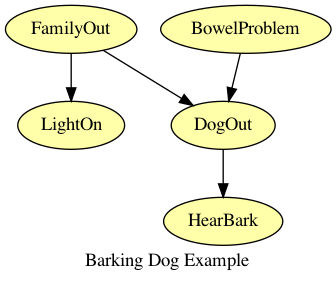

In [29]:
bn.display()

In [30]:
bn.display_tables()

## Inference

In [31]:
# Enables exact inference
ie = gum.LazyPropagation(bn)

### 1/ Global Probability Distribution

It follows from the Bayesian network structure that

$p(F, B, L, D, H) = p(D | F, B) \cdot p(L | F) \cdot p(H | D) \cdot p(F) \cdot p(B)$

Note, calculating the global distribution takes exponential time and space - do not do this for larger examples!

In [32]:
ie.addJointTarget(bn.nodes())
ie.makeInference()
glob = ie.jointPosterior(bn.nodes())
glob

(gum::Potential<double>@0x7fe764ecf780) <FamilyOut:0|BowelProblem:0|DogOut:0|HearBark:0|LightOn:0> :: 0.554002 /<FamilyOut:1|BowelProblem:0|DogOut:0|HearBark:0|LightOn:0> :: 0.0058806 /<FamilyOut:0|BowelProblem:1|DogOut:0|HearBark:0|LightOn:0> :: 0.000239828 /<FamilyOut:1|BowelProblem:1|DogOut:0|HearBark:0|LightOn:0> :: 5.94e-06 /<FamilyOut:0|BowelProblem:0|DogOut:1|HearBark:0|LightOn:0> :: 0.0719483 /<FamilyOut:1|BowelProblem:0|DogOut:1|HearBark:0|LightOn:0> :: 0.016038 /<FamilyOut:0|BowelProblem:1|DogOut:1|HearBark:0|LightOn:0> :: 0.00234983 /<FamilyOut:1|BowelProblem:1|DogOut:1|HearBark:0|LightOn:0> :: 0.0001782 /<FamilyOut:0|BowelProblem:0|DogOut:0|HearBark:1|LightOn:0> :: 0.00559597 /<FamilyOut:1|BowelProblem:0|DogOut:0|HearBark:1|LightOn:0> :: 5.94e-05 /<FamilyOut:0|BowelProblem:1|DogOut:0|HearBark:1|LightOn:0> :: 2.4225e-06 /<FamilyOut:1|BowelProblem:1|DogOut:0|HearBark:1|LightOn:0> :: 6e-08 /<FamilyOut:0|BowelProblem:0|DogOut:1|HearBark:1|LightOn:0> :: 0.167879 /<FamilyOut:1|BowelProblem:0|DogOut:1|HearBark:1|LightOn:0> :: 0.037422 /<FamilyOut:0|BowelProblem:1|DogOut:1|HearBark:1|LightOn:0> :: 0.00548293 /<FamilyOut:1|BowelProblem:1|DogOut:1|HearBark:1|LightOn:0> :: 0.0004158 /<FamilyOut:0|BowelProblem:0|DogOut:0|HearBark:0|LightOn:1> :: 0.029158 /<FamilyOut:1|BowelProblem:0|DogOut:0|HearBark:0|LightOn:1> :: 0.0088209 /<FamilyOut:0|BowelProblem:1|DogOut:0|HearBark:0|LightOn:1> :: 1.26225e-05 /<FamilyOut:1|BowelProblem:1|DogOut:0|HearBark:0|LightOn:1> :: 8.91e-06 /<FamilyOut:0|BowelProblem:0|DogOut:1|HearBark:0|LightOn:1> :: 0.00378675 /<FamilyOut:1|BowelProblem:0|DogOut:1|HearBark:0|LightOn:1> :: 0.024057 /<FamilyOut:0|BowelProblem:1|DogOut:1|HearBark:0|LightOn:1> :: 0.000123675 /<FamilyOut:1|BowelProblem:1|DogOut:1|HearBark:0|LightOn:1> :: 0.0002673 /<FamilyOut:0|BowelProblem:0|DogOut:0|HearBark:1|LightOn:1> :: 0.000294525 /<FamilyOut:1|BowelProblem:0|DogOut:0|HearBark:1|LightOn:1> :: 8.91e-05 /<FamilyOut:0|BowelProblem:1|DogOut:0|HearBark:1|LightOn:1> :: 1.275e-07 /<FamilyOut:1|BowelProblem:1|DogOut:0|HearBark:1|LightOn:1> :: 9e-08 /<FamilyOut:0|BowelProblem:0|DogOut:1|HearBark:1|LightOn:1> :: 0.00883575 /<FamilyOut:1|BowelProblem:0|DogOut:1|HearBark:1|LightOn:1> :: 0.056133 /<FamilyOut:0|BowelProblem:1|DogOut:1|HearBark:1|LightOn:1> :: 0.000288575 /<FamilyOut:1|BowelProblem:1|DogOut:1|HearBark:1|LightOn:1> :: 0.0006237

### 2/ Marginal Distribution

The following figure shows all marginal distributions (without evidence). For example

$p(F) = \sum_{B, L, D, H} p(F, B, L, D, H)$

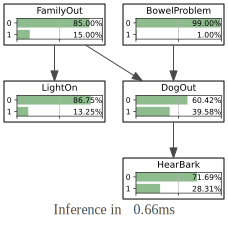

In [33]:
gnb.showInference(bn, evs={})

### 3/ Conditional Distribution

Calculate the conditional distribution of my family being out given that the dog is in the backward. There is no more evidence available. We leave this as an exercise and do not provide a solution.